In [1]:
import pygad
import numpy as np

In [2]:
from ipywidgets import IntProgress
from IPython.display import display

In [3]:
from cost_calculator import CostCalculator

In [4]:
l = 1
n = 5
m = 4
k = 3

In [5]:
M = 10 ** 6

In [6]:
T = np.array([
    [  1,   0,   0,   0],
    [0.5, 0.5,   0,   0],
    [  0, 0.5, 0.5,   0],
    [  0,   0, 0.5, 0.5],
    [  0,   0,   0,   1]
])

In [7]:
D = np.array([
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

In [8]:
C = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
])

In [9]:
E = np.array([
    [1, 0, 0, 0, 0]
])

In [10]:
num_generations = 10

sol_per_pop = 4
num_parents_mating = 2

num_genes = m

min_value = 0
max_value = k - 1

init_range_low = min_value
init_range_high = max_value + 1

random_mutation_min_val = min_value
random_mutation_max_val = max_value

parent_selection_type = "sss" # sss, rws, sus, rank, random, tournament
keep_parents = 1

crossover_type = "single_point"

mutation_type = "swap" # random - не использовать, swap, inversion, scramble, adaptive
mutation_percent_genes = 10

progress = IntProgress(min=0, max=num_generations, value=0, description='genetic', bar_style='success')

In [11]:
def convert_A(solution):
    A = np.zeros((m, k))
    num_genes = len(solution)
    for i in range(num_genes):
        active_gen = solution[i]
        A[i][active_gen] = 1
    return A

In [12]:
def calculate_cost(solution):
    A = convert_A(solution)
    cost_calculator = CostCalculator(T, D, C, E, A)
    cost = cost_calculator.calculate()
    return cost

In [13]:
def on_start(ga_instance):
    pass

In [14]:
def on_fitness(ga_instance, fitnesses):
    pass

In [15]:
def on_parents(ga_instance, parents):
    pass

In [16]:
def on_crossover(ga_instance, offspring):
    pass

In [17]:
def on_mutation(ga_instance, offspring):
    pass

In [18]:
def on_generation(ga_instance):
    progress.value += 1

In [19]:
def on_stop(ga_instance, fitnesses):
    pass

In [20]:
def fitness_func(ga_instance, solution, solution_idx):
    A = convert_A(solution)
    cost = calculate_cost(solution)
    fitness = 1.0 / (cost + 1.0 / M)
    for row in A:
        if np.sum(row) != 1:
            fitness = 0

    return fitness

In [21]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       random_mutation_min_val=random_mutation_min_val,
                       random_mutation_max_val=random_mutation_max_val,
                       on_start=on_start,
                       on_fitness=on_fitness,
                       on_parents=on_parents,
                       on_crossover=on_crossover,
                       on_mutation=on_mutation,
                       on_generation=on_generation,
                       on_stop=on_stop,
                       gene_type=int
)

/Users/dambr/venv/lib/python3.12/site-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/Users/dambr/venv/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To de

In [22]:
display(progress)
ga_instance.run()

IntProgress(value=0, bar_style='success', description='genetic', max=10)

In [23]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution")
A = convert_A(solution)
print(A)
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
cost = calculate_cost(solution)
print('cost', cost)


Parameters of the best solution
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
Fitness value of the best solution = 0.9999990000010001
cost 1


/Users/dambr/venv/lib/python3.12/site-packages/pygad/visualize/plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


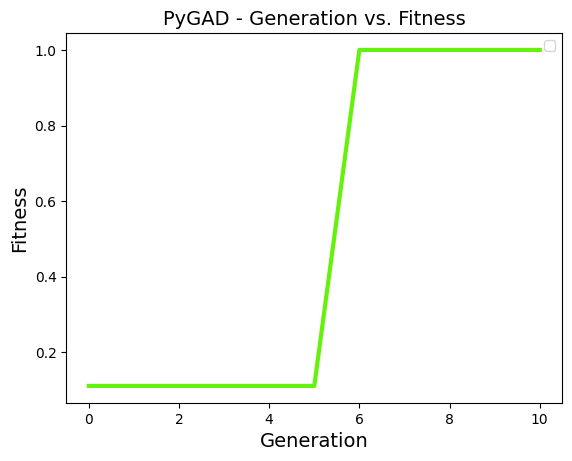

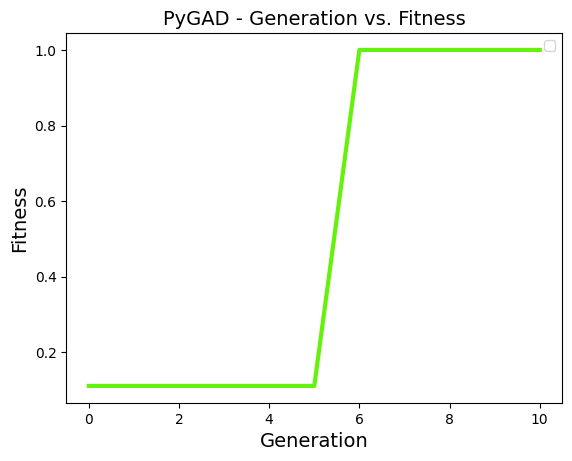

In [24]:
ga_instance.plot_fitness()